## Use Machine learning to predict the price of Old Car based on several characteristics. The objective is to build a model to understand the factors that drive the car of the price. This will help your automobile company sell their old car in the market effectively by pricing it better. 

In [303]:
import warnings


# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing,metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics 

#Model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression

## Read Data

In [24]:
df = pd.read_csv('E:\DS\ML\project\ML_Project4_Old Car Price\car-data.csv')
print(df.shape)
df.tail()

(15157, 8)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
15152,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,2006,1250,Manual,82704,Petrol,150,46.3,1.2
15156,2007,2295,Manual,74000,Petrol,145,46.3,1.2


# 1. EDA 

###  a) Missing/Null values

In [25]:
df.isna().sum() 

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

###  Information of data:   Check with invalid values and treat it with required metrics 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          15157 non-null  int64  
 1   price         15157 non-null  int64  
 2   transmission  15157 non-null  object 
 3   mileage       15157 non-null  int64  
 4   fuelType      15157 non-null  object 
 5   tax           15157 non-null  int64  
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 947.4+ KB


### Describe data 

In [27]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


### Change Col name of Mileage to Total_km driven 

In [28]:
df.rename(columns={'mileage':'Total_km'}, inplace=True)
df.head()

,year,price,transmission,Total_km,fuelType,tax,mpg,engineSize
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


### Convert engineSize into Int and mpg into Float 

In [29]:
df['engineSize'] = df['engineSize'].astype(float)
df['mpg'] = df['mpg'].astype(float)

## b) Distribution of Target Variable ie price 

C:\Users\91750\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

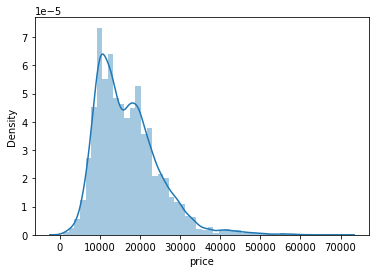

In [30]:
sns.distplot(df['price'], kde=True)

From above Price data  distritn is having little right skewness so we have to normalize.

## c) Check Outliers  for Mpg & Tax

C:\Users\91750\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

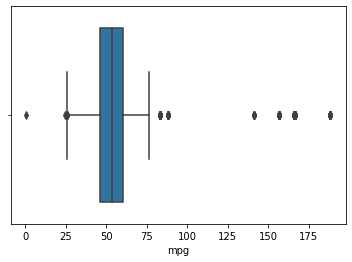

In [31]:
sns.boxplot(df['mpg'])

### Drop mpg> 80 & mpg<10

In [32]:
df.drop(df[df['mpg']>80].index, inplace=True ) 
df.drop(df[df['mpg']<10].index, inplace=True)

C:\Users\91750\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mpg'>

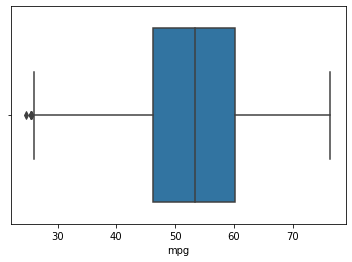

In [33]:
sns.boxplot(df['mpg'])

So Their is no outlier now  

C:\Users\91750\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tax'>

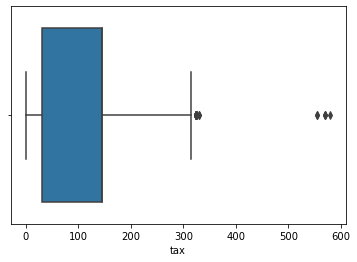

In [34]:
# Outlier Tax
sns.boxplot(df['tax'])

Remove outliers in Tax having Tax >350 

In [35]:
df.drop( df[df['tax']>350].index, inplace=True )

C:\Users\91750\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_km'>

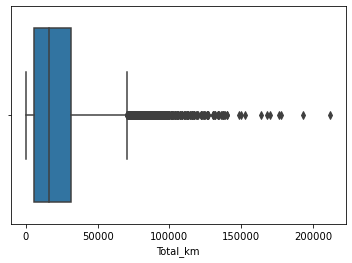

In [36]:
# Outlier Total_km
sns.boxplot(df['Total_km'])

In [37]:
# delete outlier Total_km>150000
df.drop(df[df['Total_km']>180000].index, inplace=True)               

## d) Feature Creation 

In [38]:
df.head()

,year,price,transmission,Total_km,fuelType,tax,mpg,engineSize
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


create feature [No year] i.e how many years old is car with help of buyer date & currentDate 

In [39]:
# Add current year coln
df['current_year']=2021
df.head()

,year,price,transmission,Total_km,fuelType,tax,mpg,engineSize,current_year
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,2021
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,2021
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,2021
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,2021
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2021


In [40]:
# create No_year
df['No_of_year'] = df['current_year']-df['year']

# unrequired Delete  coln year& current
df.drop(['year'],axis=1,inplace=True)
df.drop(['current_year'], axis=1, inplace=True)
df.head()

,price,transmission,Total_km,fuelType,tax,mpg,engineSize,No_of_year
0,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


## E) Avg Price of Old Car by Fuel-Type  

<AxesSubplot:xlabel='fuelType'>

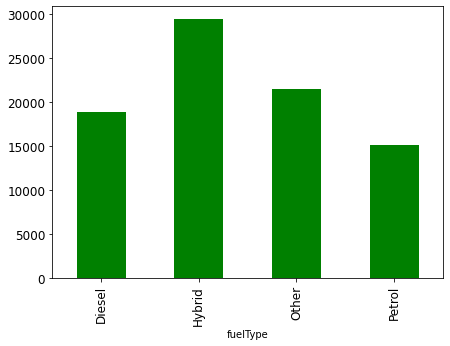

In [61]:
plt.figure(figsize=(7,5))
df.groupby('fuelType')['price'].mean().plot(kind='bar',color='g',fontsize=12)

### Avg price by Transmission of cars    

Text(0, 0.5, 'Price')

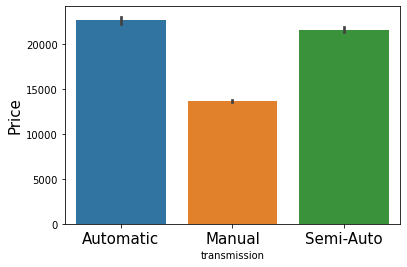

In [107]:
ax = sns.barplot(x=df['transmission'],y=df['price'])
plt.xticks(fontsize=15)
ax.set_ylabel('Price',fontsize=15)

###  Car Age v.s  Price

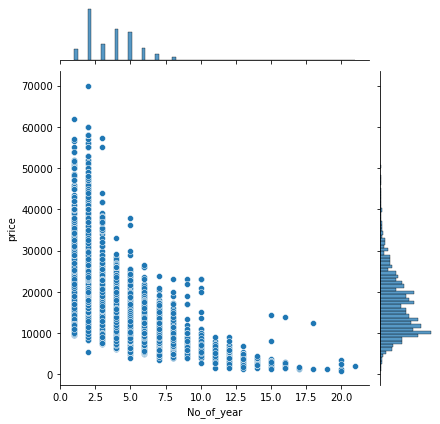

In [109]:
sns.jointplot(x=df['No_of_year'], y=df['price'], kind='scatter')

## F) OneHot Encoding & Correlations

In [137]:
le = LabelEncoder()
df['transmission']=le.fit_transform(df['transmission'])
df['fuelType']=le.fit_transform(df['fuelType'])
df.head()

,price,transmission,Total_km,fuelType,tax,mpg,engineSize,No_of_year
0,25000,0,13904,0,145,49.6,2.0,2
1,26883,0,4562,0,145,49.6,2.0,2
2,20000,1,7414,0,145,50.4,2.0,2
3,33492,0,4825,3,145,32.5,2.0,2
4,22900,2,6500,3,150,39.8,1.5,2


### Coorelations Heatmap with Target variable

<AxesSubplot:>

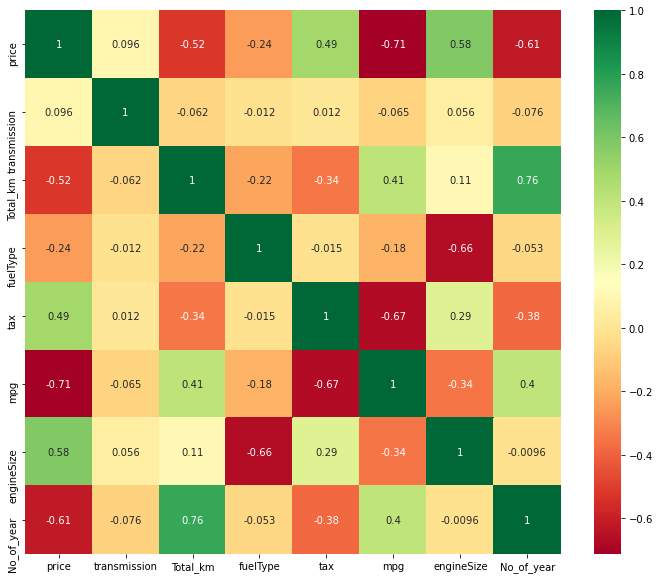

In [144]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

Engine size, tax, Transmission these have more impact on Price 

### Reset index data as we have dropped some row my index is not changed so reset it

In [113]:
df.reset_index(drop=True, inplace=True)

In [115]:
df.shape

(14990, 8)

# 2. Data PreProcessing

## a) Feature importance 

In [146]:
df.head()

,price,transmission,Total_km,fuelType,tax,mpg,engineSize,No_of_year
0,25000,0,13904,0,145,49.6,2.0,2
1,26883,0,4562,0,145,49.6,2.0,2
2,20000,1,7414,0,145,50.4,2.0,2
3,33492,0,4825,3,145,32.5,2.0,2
4,22900,2,6500,3,150,39.8,1.5,2


In [245]:
#independent and dependent varriable
X = df.iloc[:,1:] 
y = df.iloc[:,0]  
y.head()

0    25000
1    26883
2    20000
3    33492
4    22900
Name: price, dtype: int64

In [150]:
#Model fitted
model0 = ExtraTreesRegressor()
model0.fit(X,y)

ExtraTreesRegressor()

In [168]:
#Feature_importances
print(model0.feature_importances_)

[0.0334947  0.11227832 0.05781824 0.10925667 0.383052   0.15067456
 0.15342552]


<AxesSubplot:>

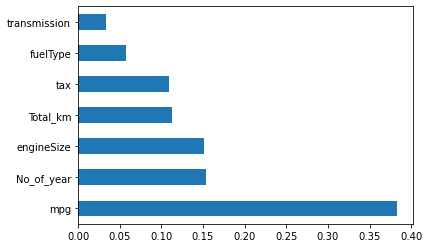

In [184]:
#Visualisatn
ax = pd.Series(model0.feature_importances_, index=X.columns )
ax.sort_values(ascending=False).plot(kind='barh')

## b) Normalize/scaling the variables

In [279]:
sc = MinMaxScaler()
X= sc.fit_transform(X)

## c) Split 

In [185]:
#splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [186]:
X_train.shape

(11992, 7)

In [187]:
X_test.shape

(2998, 7)

# 3. Model Linear Regression

### a) Training

In [201]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [202]:
#Predict
y_pred1 = regressor.predict(X_test)

In [283]:
#Accuracy
print('Rsqr_value ',metrics.r2_score(y_test, y_pred1))
#print('M.S.E ', metrics.mean_squared_log_error(y_pred1,y_test))

Rsqr_value  0.8229165978736445


### c) Plotting actual vs Predicted 

C:\Users\91750\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


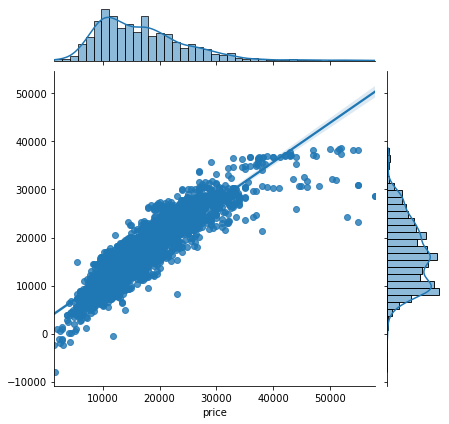

In [236]:
sns.jointplot(y_test,y_pred1, kind='reg')

From above we can observe that all actual values are very close towards the regression line(predicted) output. 

In [297]:
#from sklearn.ensemble import xgboost
import xgboost
c = xgboost.XGBRegressor()
c.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [298]:
ypred2=c.predict(X_test)

C:\Users\91750\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [305]:
cross_val_score(c,X,y,cv=10).mean()

0.8602615326552165